In [1]:
%matplotlib inline
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
import sys
sys.path.insert(0,'..')
from IPython.display import HTML
from helpers import show_hide
HTML(show_hide)

Last updated: 10/07/2015


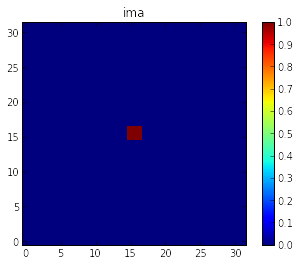

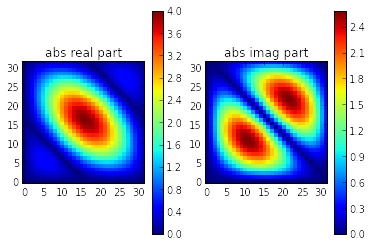

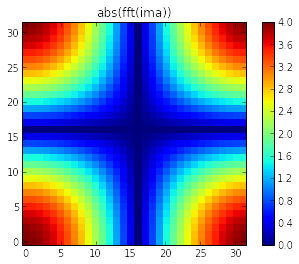

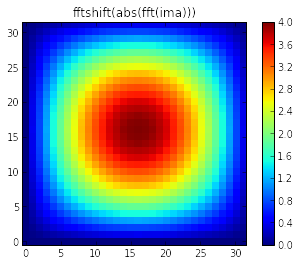

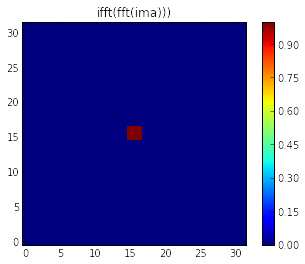

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.cm as cm
import scipy as scp
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from scipy import ndimage

w = 32
r = np.zeros((w,w),dtype = np.complexfloating)
r[w/2-1:w/2+1,w/2-1:w/2+1] = 1.0 + 0.0j

F = fft2(r)
rr = ifft2(F)

real_part = np.abs(F.real)
imag_part = np.abs(F.imag)

fig = plt.figure(1)
plt.imshow(r.real,interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('ima')

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(fftshift(real_part),interpolation='nearest',origin='lower')
plt.title('abs real part')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(fftshift(imag_part),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('abs imag part')

fig = plt.figure(3)
plt.imshow(np.abs(F),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('abs(fft(ima))')

fig = plt.figure(4)
plt.imshow(np.abs(fftshift(F)),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('fftshift(abs(fft(ima)))')

fig = plt.figure(5)
plt.imshow(rr.real,interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('ifft(fft(ima)))')

plt.show()

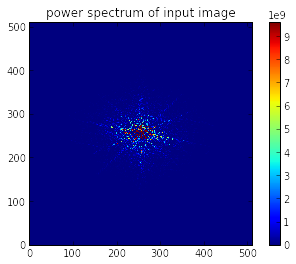

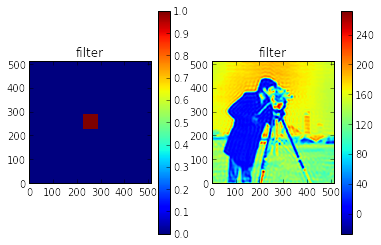

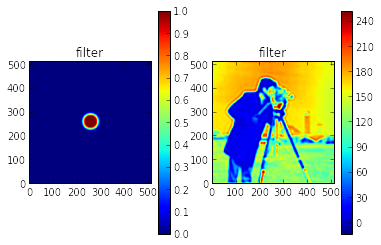

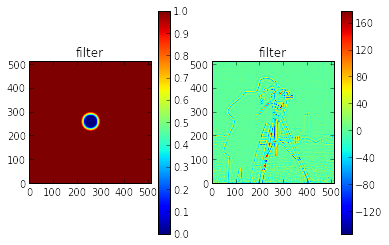

In [6]:
from skimage.data import camera
from skimage.filter import rank as skr
from skimage.morphology import disk

im = camera()[-1::-1,::]

w,h = im.shape

n = 32

#square filter
s = np.zeros(im.shape,dtype = np.complexfloating)
s[w/2-n:w/2+n,h/2-n:h/2+n] = 1.0 + 0.0j

#circular filter 
c = np.zeros(im.shape,dtype = np.complexfloating)
for i in range(w):
    for j in range(h):
        if ((i-w/2)**2 + (j-h/2)**2)<(n*n):
            c[i,j] = 1.0 + 0.0j
            
#smooth filter borders
c = skr.mean((c*255).astype('uint8'),disk(10))
c = c.astype(np.complexfloating)/255.0

F1 = fft2(im.astype(np.complexfloating))
F3 = F1*ifftshift(s)
F4 = F1*ifftshift(c)

#high pass using the complement of c
F5 = F1*ifftshift(1.0-c)

psF1 = (F1**2).real

low_pass_rec = ifft2(F3) 
low_pass_circ = ifft2(F4)
high_pass_circ = ifft2(F5) 

fig = plt.figure(1)
plt.imshow(fftshift(psF1),interpolation='nearest',origin='lower',vmin = 0,vmax = 0.00001*np.max(psF1))
plt.title('power spectrum of input image')
plt.colorbar()

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(s.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(low_pass_rec.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

fig = plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(c.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(low_pass_circ.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

fig = plt.figure(4)
plt.subplot(1,2,1)
plt.imshow(1.0-c.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(high_pass_circ.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

plt.show()

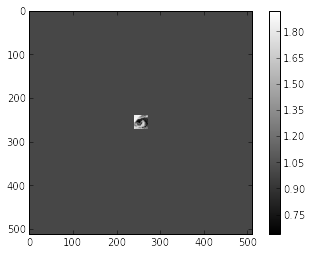

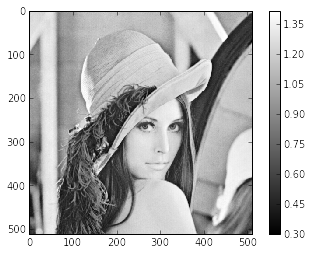

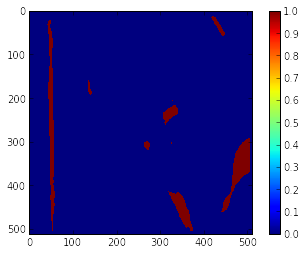

In [11]:
from skimage.data import lena


im = lena()[:,:,0].astype('float')
target_center = (332,266)
w = 16
crop = im[target_center[1]-w:target_center[1]+w,target_center[0]-w:target_center[0]+w]
size = im.shape

g = np.zeros(size,dtype = np.complexfloating)
g.fill(128)
g[size[1]/2-w:size[1]/2+w,size[0]/2-w:size[0]/2+w] = crop

#normalize
g = g/np.mean(g)
f = im/np.mean(im)

plt.figure(2)
plt.imshow(g.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()

f = f.astype(np.complexfloating)
F = fft2(f)
G = np.conjugate(fft2(g))

plt.figure(3)
plt.imshow(f.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()


R = F*G
r = ifft2(R).real

top = ( r >= (0.9999*np.max(r)))

plt.figure(4)
plt.imshow(ifftshift(top),interpolation='nearest')
plt.colorbar()


plt.show()